In [1]:
import numpy as np
import gzip
import idx2numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

In [2]:
with gzip.open('./data/train-images-idx3-ubyte.gz','r') as f:
    train_X = idx2numpy.convert_from_file(f).reshape(-1,28,28,1)
with gzip.open('./data/train-labels-idx1-ubyte.gz','r') as f:
    train_y = idx2numpy.convert_from_file(f)
with gzip.open('./data/t10k-images-idx3-ubyte.gz','r') as f:
    test_X = idx2numpy.convert_from_file(f).reshape(-1,28,28,1)
with gzip.open('./data/t10k-labels-idx1-ubyte.gz','r') as f:
    test_y = idx2numpy.convert_from_file(f)

In [3]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [4]:
tf.compat.v1.disable_eager_execution()

In [5]:
with tf.compat.v1.Session() as sess:
    train_y = sess.run(tf.one_hot(train_y,10))
    test_y = sess.run(tf.one_hot(test_y,10))
    sess.close()

## Keras CNN Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [45]:
model = Sequential()

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 201s 3ms/sample - loss: 0.1873 - acc: 0.9539 - val_loss: 0.0869 - val_acc: 0.9741
Epoch 2/3
60000/60000 [==============================] - 209s 3ms/sample - loss: 0.0651 - acc: 0.9801 - val_loss: 0.0697 - val_acc: 0.9795
Epoch 3/3
60000/60000 [==============================] - 217s 4ms/sample - loss: 0.0450 - acc: 0.9862 - val_loss: 0.0959 - val_acc: 0.9747


In [48]:
model.predict(test_X[:4])

array([[5.03980928e-12, 2.27873688e-12, 8.24559621e-09, 6.69247271e-08,
        1.05282944e-11, 1.86015591e-12, 1.45224155e-14, 9.99999881e-01,
        1.22725941e-09, 4.78766582e-09],
       [3.81755010e-11, 3.31292000e-07, 9.99999523e-01, 1.96435868e-09,
        2.87126009e-13, 4.00747664e-12, 8.02517661e-08, 8.67680320e-12,
        3.17919167e-08, 4.45040380e-13],
       [1.90411198e-09, 9.99996424e-01, 2.27395660e-07, 5.98995409e-10,
        3.22115716e-06, 2.59707988e-08, 2.72735834e-09, 1.50744999e-08,
        6.44199787e-08, 6.42956910e-10],
       [9.99998927e-01, 5.36512061e-08, 6.45925468e-07, 3.53597684e-08,
        1.18014425e-08, 1.84402726e-09, 3.47178911e-07, 5.12599989e-08,
        1.72267320e-08, 1.17344650e-08]], dtype=float32)

In [49]:
np.argmax(model.predict(test_X[:4]),1)

array([7, 2, 1, 0])

In [51]:
np.argmax(test_y[:4],1)

array([7, 2, 1, 0])

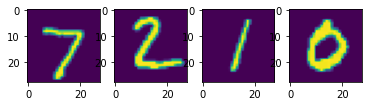

In [64]:
num_of_images = 4
f, axarr = plt.subplots(1,num_of_images)
for i in range(num_of_images):
    img = test_X[i].reshape(28,28)
    axarr[i].imshow(img)

In [65]:
model.evaluate(test_X,test_y)

10000/10000 [==============================] - 6s 570us/sample - loss: 0.0959 - acc: 0.9747


[0.09585735392577481, 0.9747]

In [21]:
model1 = Sequential()

model1.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model1.add(Conv2D(32,kernel_size=3,activation='relu'))
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))

In [22]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.9
# config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config).close()

In [19]:
tf.keras.backend.clear_session()

In [23]:
model1.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=10, epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d/Conv2D}}]]
	 [[loss/mul/_75]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d/Conv2D}}]]
0 successful operations.
0 derived errors ignored.

After executing tf's one-hot encoding

In [6]:
model1 = tensorflow.keras.models.load_model('./MNIST_CNN.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model1.predict(test_X[:4])

In [ ]:
np.argmax(test_y[:4],1)